In [1]:
import scipy.io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import importlib
import warnings

warnings.filterwarnings('ignore')
from tensorflow.keras.models import load_model

import Model
importlib.reload(Model)

def visualize_history(history):
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))

    # Plot Loss (Train & Validation)
    axs[0].plot(history.history['loss'], label='Train Loss', marker='o', markersize=4)
    axs[0].plot(history.history['val_loss'], label='Val Loss', marker='*', markersize=4)
    axs[0].set_title('Model Loss')
    axs[0].set_xlabel('Epoch')
    axs[0].set_ylabel('Loss')
    axs[0].legend()
    axs[0].grid(True)

    # Plot Accuracy (Train & Validation)
    axs[1].plot(history.history['accuracy'], label='Train Accuracy', marker='o', markersize=4)
    axs[1].plot(history.history['val_accuracy'], label='Val Accuracy', marker='*', markersize=4)
    axs[1].set_title('Model Accuracy')
    axs[1].set_xlabel('Epoch')
    axs[1].set_ylabel('Accuracy')
    axs[1].legend()
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()


def get_dataset(path, classes, show_labels):
    for c_idx, c in enumerate(classes):
        raw_data = os.listdir(path+c)
        if len(raw_data) == 1:
            mat = scipy.io.loadmat(path+c+raw_data[0])
        else:
            print("There is more than one dataset - check")

        if c_idx == 0:
            #print(f"Import matlab raw dataset - Matlab file Keys: {mat.keys()}")
            pass

        if mat['Data_Cls'].shape[-1] != mat['Data_Fea'].shape[-1]:
            print(f"Label and dataset do not match! : {len(mat['Data_Cls'])}, {len(mat['Data_Fea'])}")
            break

        if c_idx == 0:
            feature_set = np.transpose(mat['Data_Fea'], (2, 0, 1))  # shape: (1729, 4, 14)
            labels = mat['Data_Cls'].flatten()  #0 or class (either one)

        elif c_idx > 0:
            feature_set_added = np.transpose(mat['Data_Fea'], (2, 0, 1))
            labels_addend = mat['Data_Cls'].flatten()  #0 or class (either one)

            feature_set = np.concatenate([feature_set, feature_set_added], axis=0)
            labels = np.concatenate([labels, labels_addend], axis=0)
        else:
            print("Error in c_idx")
            break

    if show_labels:
        plt.figure(figsize=(8,3))
        plt.plot(labels)
        plt.ylabel('Class label', fontsize=13)
        plt.xlabel('Samples', fontsize=13)
        plt.grid(True, which='both', linestyle='--')
        plt.show()

    return feature_set, labels


def split_data(X, Y, ratio):
    #Splits (N, C, F) data and 1D labels into training and validation sets.

    num_samples = X.shape[0]
    indices = np.random.permutation(num_samples)

    training_size = int(round(num_samples * ratio))
    training_indices = indices[:training_size]
    validation_indices = indices[training_size:]

    training_data = X[training_indices]
    training_labels = Y[training_indices]
    validation_data = X[validation_indices]
    validation_labels = Y[validation_indices]

    training_data = np.expand_dims(training_data, axis=-1)  # Adds a new channel dimension at the end
    validation_data = np.expand_dims(validation_data, axis=-1)

    return training_data, training_labels, validation_data, validation_labels

In [5]:
def get_result(path, classes, train_ratio, set_epoch, set_batch_size, version, X_test_prev_all, y_test_prev_all, First_time):

    feature_set, labels = get_dataset(path, classes, show_labels=False)
    X_train, y_train, X_test, y_test = split_data(feature_set, labels, ratio=train_ratio)

    model = Model.Original_model_V1(X_train.shape[1:])
    init_acc = model.evaluate(X_test, y_test, verbose=0)[1]  #Before training
    #Init_acc_all.append(acc)

    history, _ = Model.Train_model(model, X_train, y_train, X_test, y_test, set_epoch, set_batch_size, version, set_verbose=0, save_model_set=False)
    visualize_history(history)
    test_acc = float(np.max(history.history['val_accuracy']))

    if First_time:
        X_test_prev_all = X_test
        y_test_prev_all = y_test

    else:
        X_test_prev_all = np.concatenate((X_test_prev_all, X_test), axis=0)
        y_test_prev_all = np.concatenate((y_test_prev_all, y_test), axis=0)

    Prev_acc = model.evaluate(X_test_prev_all, y_test_prev_all, verbose=0)[1]

    return init_acc, test_acc, Prev_acc, X_test_prev_all, y_test_prev_all

In [6]:
default_path = "C:/Users/hml76/OneDrive/문서/MATLAB/data/"
classes = ['1/','2/','3/','4/','5/']
version = 'V1'

Info = ['Stand (5/27)', 'Stand (6/18)', 'Stand (6/20)', 'Sit_chair (6/20)', 'Sit_chair_leg_crossed (6/20)', 'Sit_floor (6/20)',
        'Stand (6/20-v2)', 'Sit_chair (6/20-v2)', 'Sit_chair_leg_crossed (6/20-v2)', 'Sit_floor (6/20-v2)']


path = default_path + 'Exp_2025-05-27/E8331D05289A/raw/'

Trained_acc_all, Prev_acc_all, Init_acc_all = [], [], []
set_epoch, set_batch_size = 50, 256
train_ratio = 0.5

Dataset 1/14 - Session Exp_2025-05-27/E8331D05289A/

Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 87.43%
Maximum validation accuracy : 93.86%


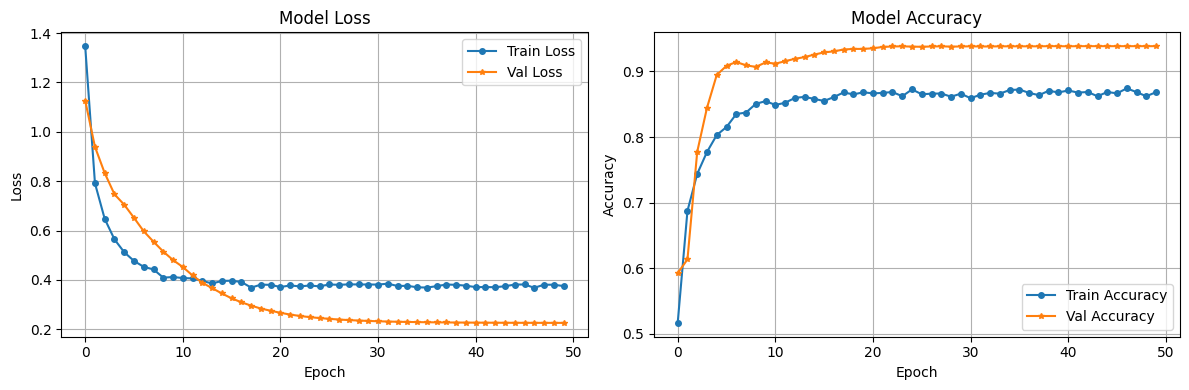

Dataset 2/14 - Session Exp_2025-06-18/E9AD0E7DCC2B/

Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 83.64%
Maximum validation accuracy : 87.08%


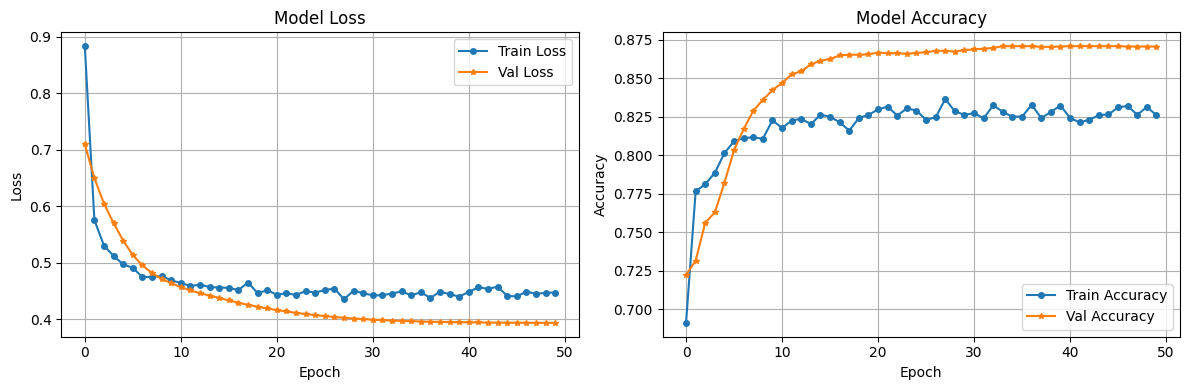

Dataset 3/14 - Session Exp_2025-06-20-v1/E9AD0E7DCC2B/

Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 87.75%
Maximum validation accuracy : 92.9%


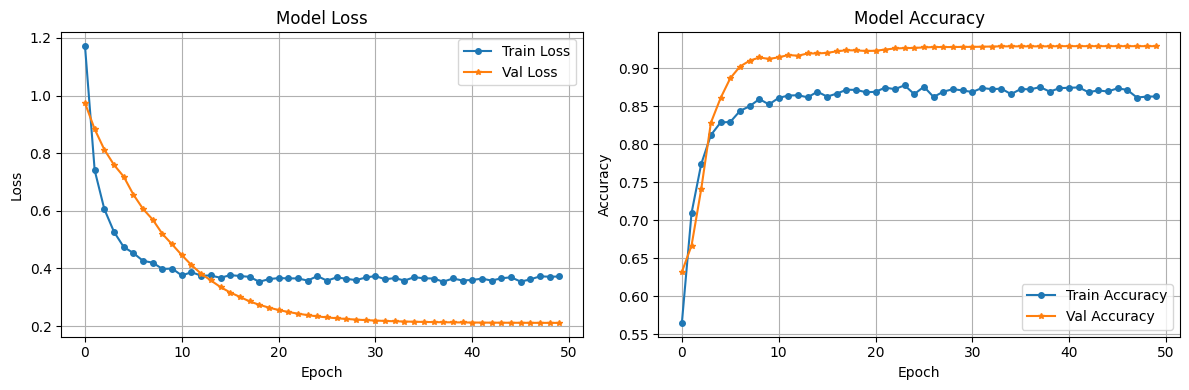

Dataset 4/14 - Session Exp_2025-06-20-v2/E9AD0E7DCC2B/

Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 86.09%
Maximum validation accuracy : 91.39%


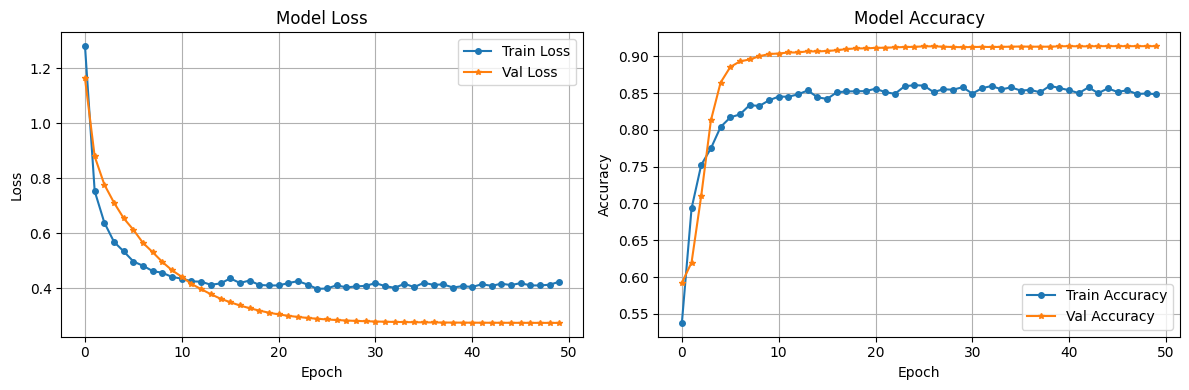

Dataset 5/14 - Session Exp_2025-06-20-v3/E9AD0E7DCC2B/

Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 83.14%
Maximum validation accuracy : 89.25%


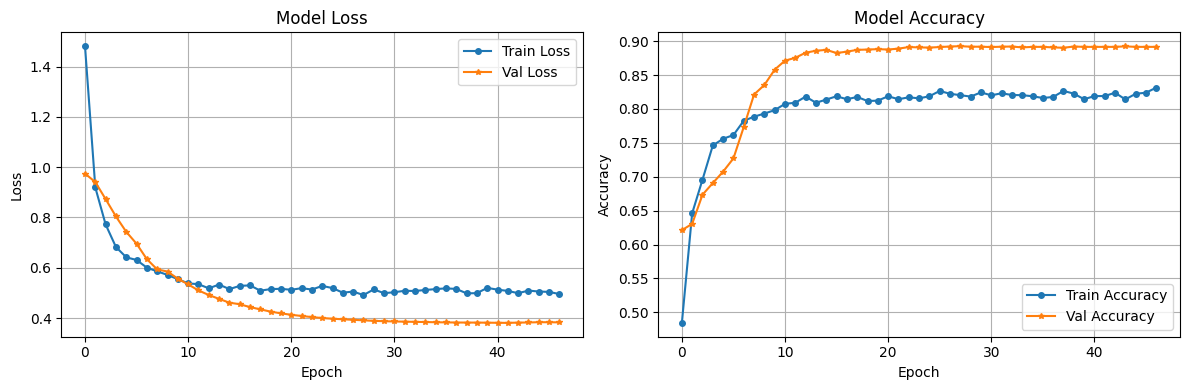

Dataset 6/14 - Session Exp_2025-06-20-v4/E9AD0E7DCC2B/

Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 81.28%
Maximum validation accuracy : 86.74%


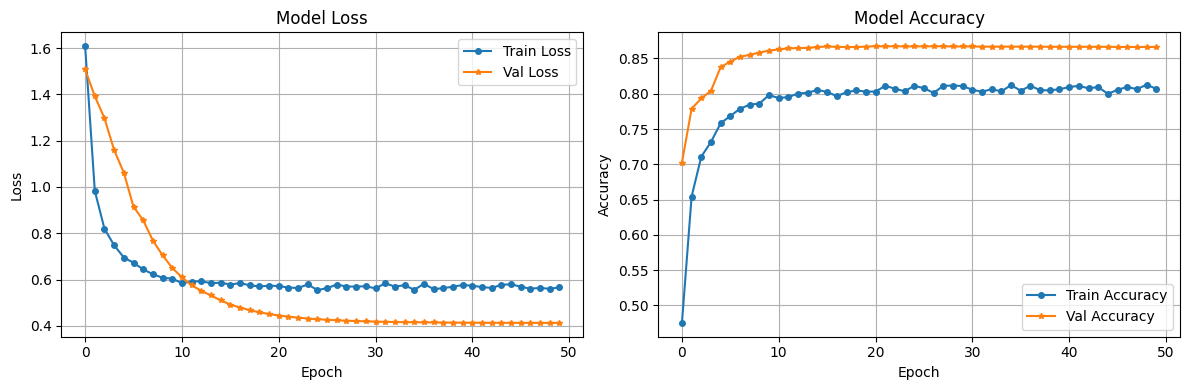

Dataset 7/14 - Session Exp_2025-06-20-v5/E9AD0E7DCC2B/

Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 86.03%
Maximum validation accuracy : 93.48%


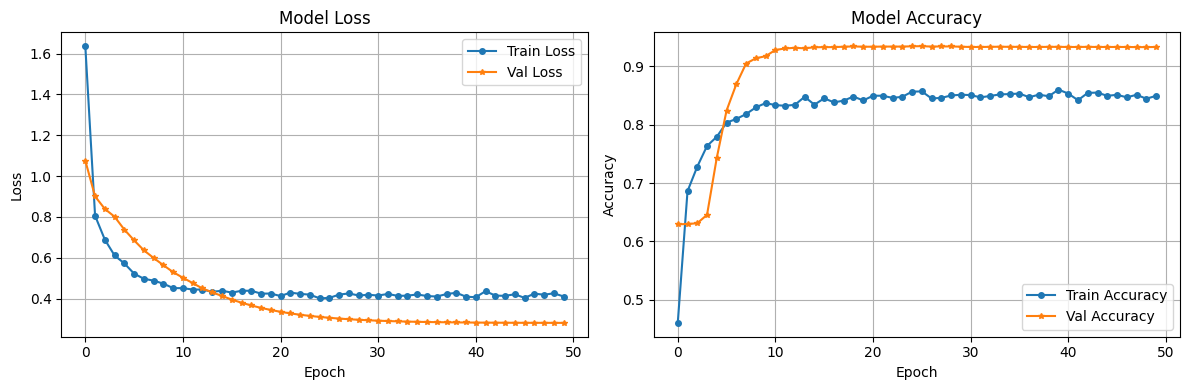

Dataset 8/14 - Session Exp_2025-06-20-v6/E9AD0E7DCC2B/

Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 80.13%
Maximum validation accuracy : 84.25%


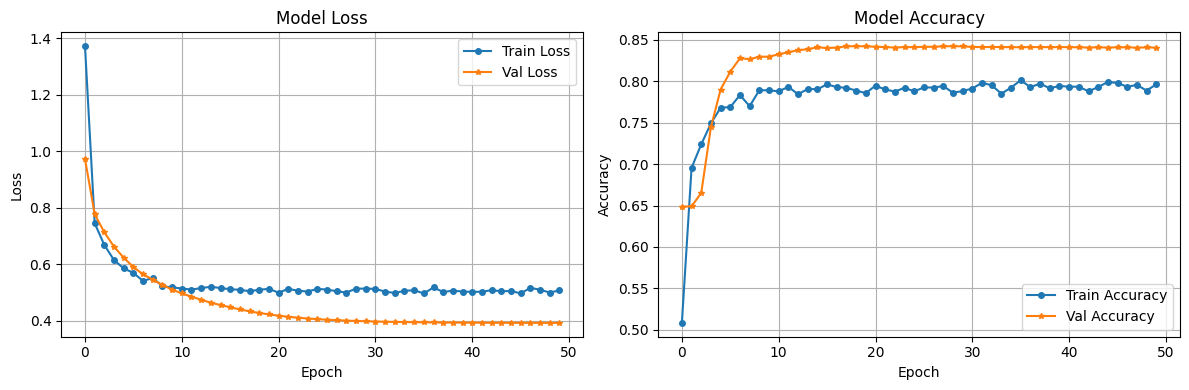

Dataset 9/14 - Session Exp_2025-06-20-v7/E9AD0E7DCC2B/

Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 82.82%
Maximum validation accuracy : 91.77%


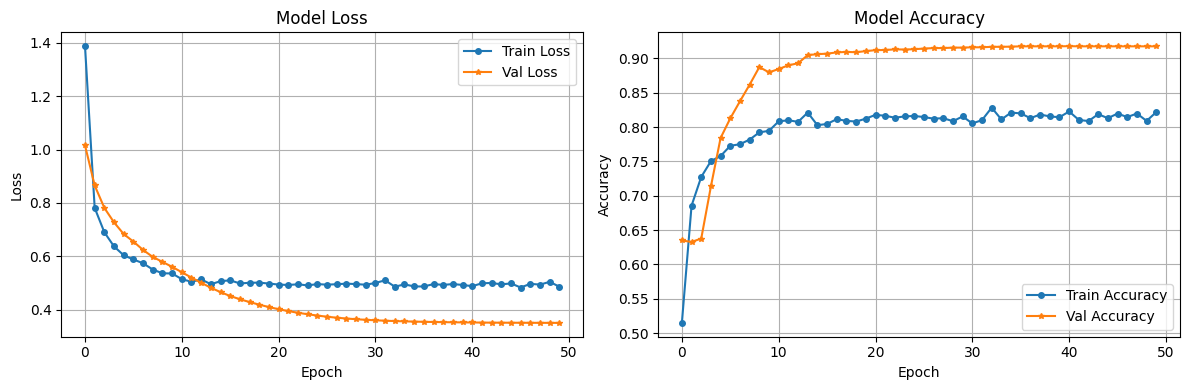

Dataset 10/14 - Session Exp_2025-06-20-v8/E9AD0E7DCC2B/

Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 85.57%
Maximum validation accuracy : 92.72%


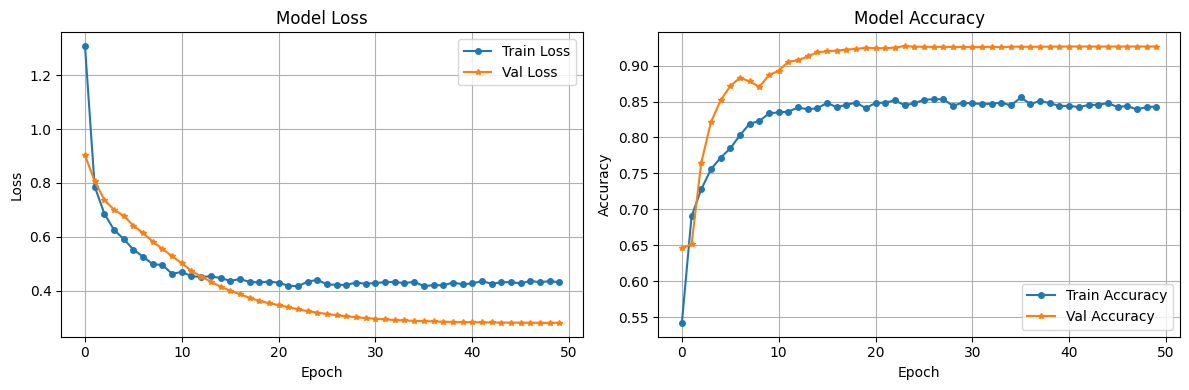

Dataset 11/14 - Session Exp_2025-06-23-v1/E9AD0E7DCC2B/

Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 87.52%
Maximum validation accuracy : 93.67%


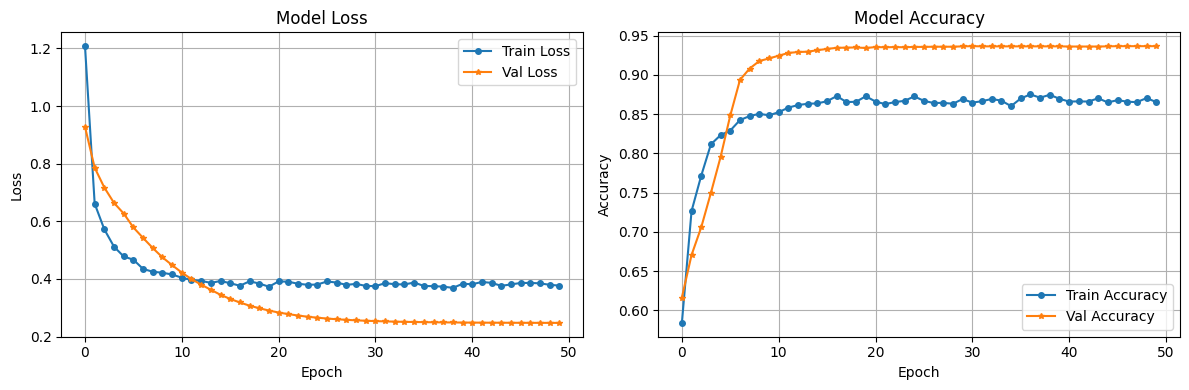

Dataset 12/14 - Session Exp_2025-06-23-v2/E9AD0E7DCC2B/

Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 85.81%
Maximum validation accuracy : 89.02%


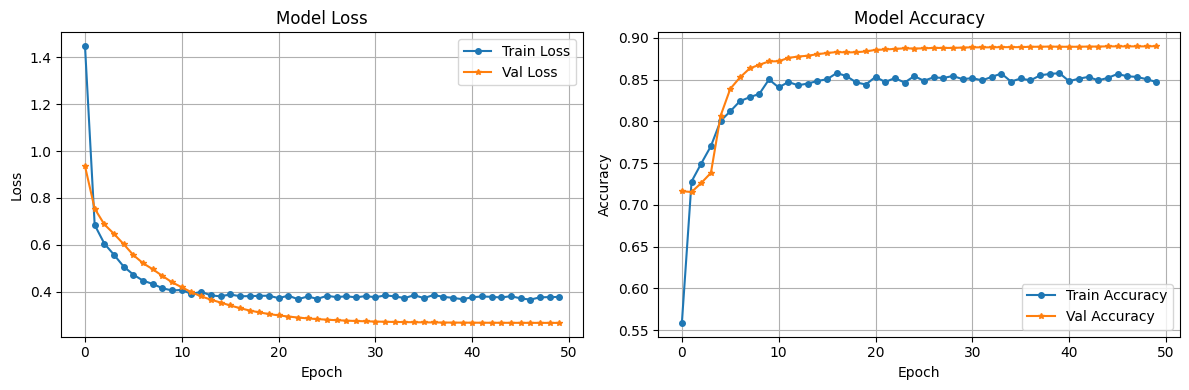

Dataset 13/14 - Session Exp_2025-06-23-v3/E9AD0E7DCC2B/

Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 84.93%
Maximum validation accuracy : 92.65%


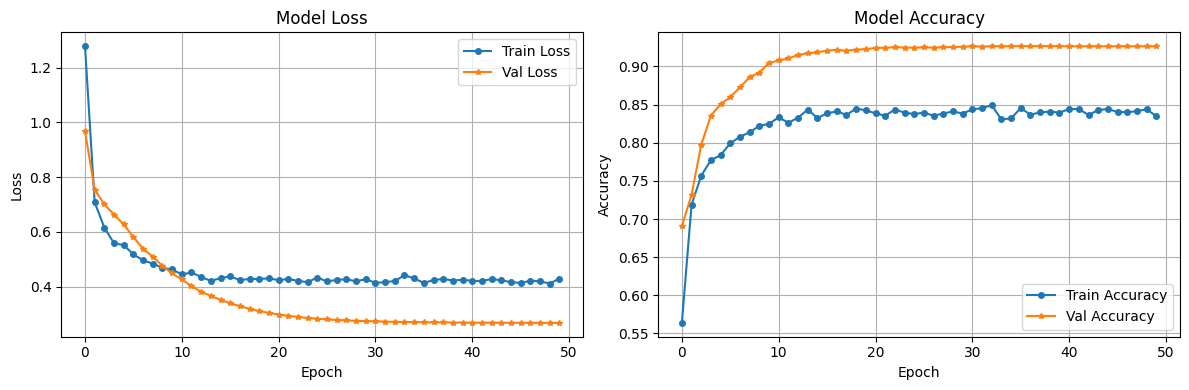

Dataset 14/14 - Session Exp_2025-06-20-v4/E9AD0E7DCC2B/

Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 81.72%
Maximum validation accuracy : 86.3%


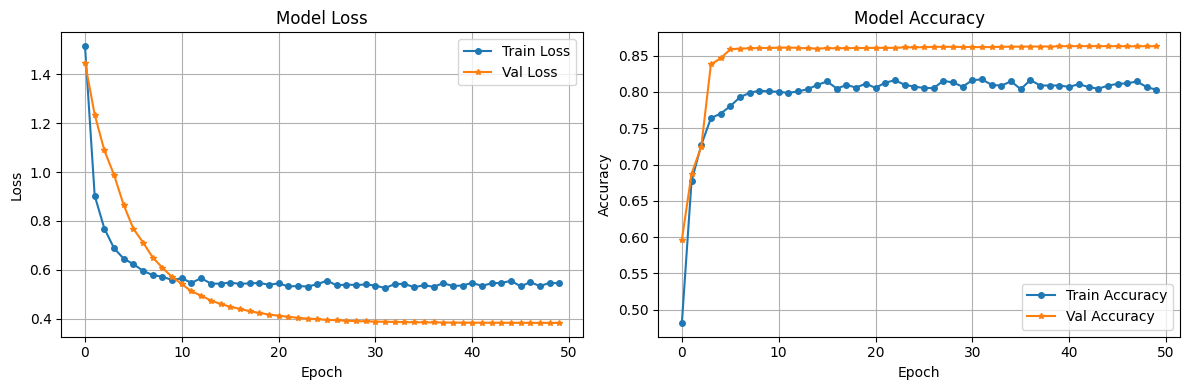

In [9]:
dataset = ["Exp_2025-05-27/E8331D05289A/", "Exp_2025-06-18/E9AD0E7DCC2B/", "Exp_2025-06-20-v1/E9AD0E7DCC2B/", "Exp_2025-06-20-v2/E9AD0E7DCC2B/", "Exp_2025-06-20-v3/E9AD0E7DCC2B/",
           "Exp_2025-06-20-v4/E9AD0E7DCC2B/", "Exp_2025-06-20-v5/E9AD0E7DCC2B/", "Exp_2025-06-20-v6/E9AD0E7DCC2B/", "Exp_2025-06-20-v7/E9AD0E7DCC2B/", "Exp_2025-06-20-v8/E9AD0E7DCC2B/",
           "Exp_2025-06-23-v1/E9AD0E7DCC2B/", "Exp_2025-06-23-v2/E9AD0E7DCC2B/", "Exp_2025-06-23-v3/E9AD0E7DCC2B/", "Exp_2025-06-20-v4/E9AD0E7DCC2B/"]

X_test_prev_all, y_test_prev_all = [], []

for idx, sessions in enumerate(dataset):
    print(f"===========================================\nDataset {idx+1}/{len(dataset)} - Session {sessions}\n===========================================\n")
    path = default_path + sessions + 'raw/'
    if idx == 0:
        bool_val = True
    else:
        bool_val = False

    init_acc, test_acc, Prev_acc, X_test_prev_all, y_test_prev_all = get_result(path, classes, train_ratio, set_epoch, set_batch_size, version,
                                                                                X_test_prev_all, y_test_prev_all, First_time=bool_val)

    Init_acc_all.append(init_acc)
    Trained_acc_all.append(test_acc)
    Prev_acc_all.append(Prev_acc)

In [ ]:
feature_set, labels = get_dataset(path, classes, show_labels=False)
X_train, y_train, X_test, y_test = split_data(feature_set, labels, ratio=train_ratio)
print("Shapes :", X_train.shape, y_train.shape, X_test.shape, y_test.shape)

model = Model.Original_model_V1(X_train.shape[1:])
acc = model.evaluate(X_test, y_test, verbose=0)[1]  #Before training
Init_acc_all.append(acc)

history, _ = Model.Train_model(model, X_train, y_train, X_test, y_test, set_epoch, set_batch_size, version, set_verbose=0, save_model_set=False)
visualize_history(history)
Trained_acc_all.append(float(np.max(history.history['val_accuracy'])))

X_test_prev_all, y_test_prev_all = X_test, y_test
acc = model.evaluate(X_test_prev_all, y_test_prev_all, verbose=0)[1]
Prev_acc_all.append(acc)

# New session

In [ ]:
session_info = "Exp_2025-06-18"
path = default_path + f'{session_info}/E9AD0E7DCC2B/raw/'

init_acc, test_acc, Prev_acc, X_test_prev_all, y_test_prev_all = get_result(path, classes, train_ratio, set_epoch, set_batch_size, version, X_test_prev_all, y_test_prev_all)

Init_acc_all.append(init_acc)
Trained_acc_all.append(test_acc)
Prev_acc_all.append(Prev_acc)

# New session

In [ ]:
session_info = "Exp_2025-06-20-v1"
path = default_path + f'{session_info}/E9AD0E7DCC2B/raw/'

init_acc, test_acc, Prev_acc, X_test_prev_all, y_test_prev_all = get_result(path, classes, train_ratio, set_epoch, set_batch_size, version, X_test_prev_all, y_test_prev_all)

Init_acc_all.append(init_acc)
Trained_acc_all.append(test_acc)
Prev_acc_all.append(Prev_acc)

In [ ]:
session_info = "Exp_2025-06-20-v2"
path = default_path + f'{session_info}/E9AD0E7DCC2B/raw/'

init_acc, test_acc, Prev_acc, X_test_prev_all, y_test_prev_all = get_result(path, classes, train_ratio, set_epoch, set_batch_size, version, X_test_prev_all, y_test_prev_all)

Init_acc_all.append(init_acc)
Trained_acc_all.append(test_acc)
Prev_acc_all.append(Prev_acc)

In [ ]:
del model

In [ ]:
session_info = "Exp_2025-06-20-v3"
path = default_path + f'{session_info}/E9AD0E7DCC2B/raw/'

init_acc, test_acc, Prev_acc, X_test_prev_all, y_test_prev_all = get_result(path, classes, train_ratio, set_epoch, set_batch_size, version, X_test_prev_all, y_test_prev_all)

Init_acc_all.append(init_acc)
Trained_acc_all.append(test_acc)
Prev_acc_all.append(Prev_acc)

In [ ]:
del model

In [ ]:
session_info = "Exp_2025-06-20-v4"
path = default_path + f'{session_info}/E9AD0E7DCC2B/raw/'

init_acc, test_acc, Prev_acc, X_test_prev_all, y_test_prev_all = get_result(path, classes, train_ratio, set_epoch, set_batch_size, version, X_test_prev_all, y_test_prev_all)

Init_acc_all.append(init_acc)
Trained_acc_all.append(test_acc)
Prev_acc_all.append(Prev_acc)

In [ ]:
del model

In [ ]:
session_info = "Exp_2025-06-20-v5"
path = default_path + f'{session_info}/E9AD0E7DCC2B/raw/'

init_acc, test_acc, Prev_acc, X_test_prev_all, y_test_prev_all = get_result(path, classes, train_ratio, set_epoch, set_batch_size, version, X_test_prev_all, y_test_prev_all)

Init_acc_all.append(init_acc)
Trained_acc_all.append(test_acc)
Prev_acc_all.append(Prev_acc)

In [ ]:
del model

In [ ]:
session_info = "Exp_2025-06-20-v6"
path = default_path + f'{session_info}/E9AD0E7DCC2B/raw/'

init_acc, test_acc, Prev_acc, X_test_prev_all, y_test_prev_all = get_result(path, classes, train_ratio, set_epoch, set_batch_size, version, X_test_prev_all, y_test_prev_all)

Init_acc_all.append(init_acc)
Trained_acc_all.append(test_acc)
Prev_acc_all.append(Prev_acc)

In [ ]:
del model

In [ ]:
session_info = "Exp_2025-06-20-v7"
path = default_path + f'{session_info}/E9AD0E7DCC2B/raw/'

feature_set, labels = get_dataset(path, classes, show_labels=False)
X_train, y_train, X_test, y_test = split_data(feature_set, labels, ratio=train_ratio)

model = Model.Original_model_V1(X_train.shape[1:])
acc = model.evaluate(X_test, y_test, verbose=0)[1]  #Before training
Init_acc_all.append(acc)

history, _ = Model.Train_model(model, X_train, y_train, X_test, y_test, set_epoch, set_batch_size, version, set_verbose=0, save_model_set=False)
visualize_history(history)
Trained_acc_all.append(float(np.max(history.history['val_accuracy'])))

X_test_prev_all = np.concatenate((X_test_prev_all, X_test), axis=0)
y_test_prev_all = np.concatenate((y_test_prev_all, y_test), axis=0)

acc = model.evaluate(X_test_prev_all, y_test_prev_all, verbose=0)[1]
Prev_acc_all.append(acc)

In [ ]:
del model

In [ ]:
session_info = "Exp_2025-06-20-v8"
path = default_path + f'{session_info}/E9AD0E7DCC2B/raw/'

feature_set, labels = get_dataset(path, classes, show_labels=False)
X_train, y_train, X_test, y_test = split_data(feature_set, labels, ratio=train_ratio)

model = Model.Original_model_V1(X_train.shape[1:])
acc = model.evaluate(X_test, y_test, verbose=0)[1]  #Before training
Init_acc_all.append(acc)

history, _ = Model.Train_model(model, X_train, y_train, X_test, y_test, set_epoch, set_batch_size, version, set_verbose=0, save_model_set=False)
visualize_history(history)
Trained_acc_all.append(float(np.max(history.history['val_accuracy'])))

X_test_prev_all = np.concatenate((X_test_prev_all, X_test), axis=0)
y_test_prev_all = np.concatenate((y_test_prev_all, y_test), axis=0)

acc = model.evaluate(X_test_prev_all, y_test_prev_all, verbose=0)[1]
Prev_acc_all.append(acc)

ValueError: x and y must have same first dimension, but have shapes (10,) and (21,)

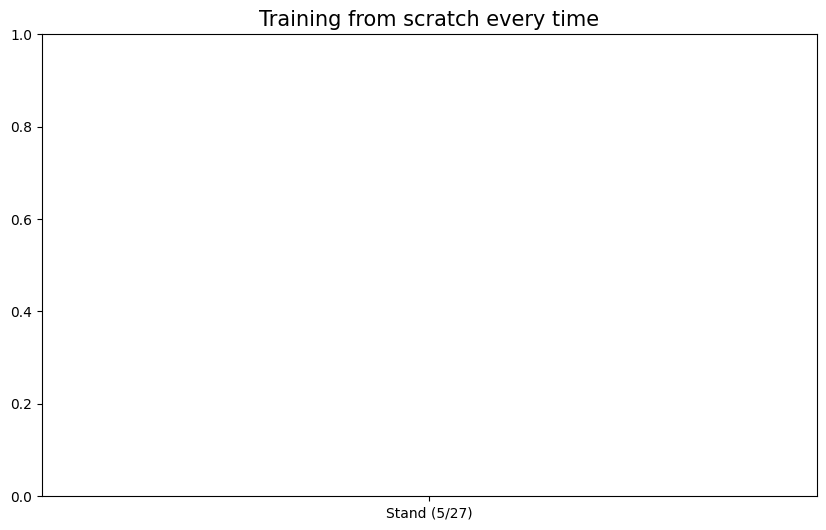

In [10]:
baseline = [0.9275, 0.8426, 0.7927, 0.8604, 0.8404, 0.6838, 0.7452, 0.8032, 0.7646, 0.7467]

plt.figure(figsize=(10, 6))
plt.title('Training from scratch every time', fontsize=15)
plt.plot(Info, Init_acc_all, marker='o', label='Model not trained with anything and tested on current data (unseen data)', linestyle='--')
plt.plot(Info, Prev_acc_all, marker='o', label='Model trained with current data and tested with Prev test datasets - stacks up as the training continues')
plt.plot(Info, Trained_acc_all, marker='o', label='Model trained with current data and tested with current test datasets - random 5:5 mix)')
plt.plot(Info, baseline, marker='^', label='Model trained using only first data (5/27)', color='red', linestyle='--')
plt.ylim([0, 1])

plt.xlabel('Date (Sessions)')
plt.ylabel('Test Accuracy')
plt.xticks(rotation=30)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
for x in [Init_acc_all, Prev_acc_all, Trained_acc_all]:
    print(f"{np.mean(x)*100:.2f}%")


1. training them from scratch (Online learning)
2. Transfer learning model
3. Meta Learning

Which is the best???